In [1]:
!pip install dask

In [2]:
!pip install dask_ml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 8.9 MB/s eta 0:00:00


In [40]:
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import time

In [31]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving labeled_data_1.csv to labeled_data_1.csv


In [79]:
# Preprocessing: Drop rows with missing values in the 'Review' column
start_time = time.time()
data = dd.read_csv("labeled_data_1.csv")
data = data.dropna(subset=['Review'])

In [80]:
# Split the data into training and test sets using Dask-ML
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/dask_ml/model_selection/_split.py:462: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


In [81]:
# Count the total number of rows in the Dask DataFrame
total_count = data.map_partitions(len).compute().sum()

print("Total number of rows:", total_count)

Total number of rows: 10599


In [85]:
# Define the feature extraction model with Scikit-learn's TfidfVectorizer
vectorizer = HashingVectorizer(n_features=1000)

# Transform and fit the vectorizer on training data
X_train = vectorizer.fit_transform(train_data["Review"].compute())
y_train = train_data["Sentiment"].compute()

data_loading_preprocessing_time = time.time() - start_time

In [86]:
start_time = time.time()
# Convert Dask arrays to NumPy arrays
X_train = X_train.toarray()
y_train = np.array(y_train)

# Train the logistic regression model using Scikit-learn
model = LogisticRegression()
model.fit(X_train, y_train)
training_time = time.time() - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
start_time = time.time()
# Predict on test data and evaluate the model
X_test = vectorizer.transform(test_data["Review"].compute())
y_test = test_data["Sentiment"].compute()
predictions = model.predict(X_test.toarray())
prediction_time = time.time() - start_time


In [92]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
start_time = time.time()
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')  # Choose appropriate average value
recall = recall_score(y_test, predictions, average='weighted')  # Choose appropriate average value
f1 = f1_score(y_test, predictions, average='weighted')  # Choose appropriate average value
Matrix_time = time.time() - start_time

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7892523364485982
Precision: 0.7822215662586688
Recall: 0.7892523364485982
F1 Score: 0.779210267921976


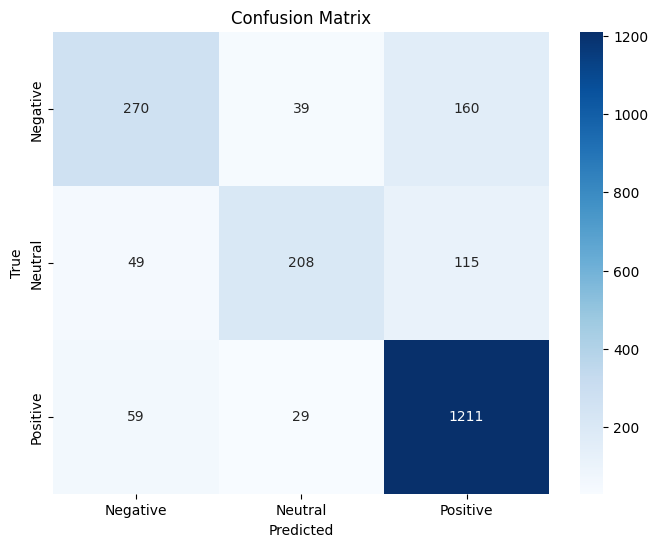

In [93]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

start_time = time.time()
# Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
confusion_time = time.time() - start_time

In [94]:
# Display all timing information
print("\nTotal Times:")
# Print results
print(f"Data Loading and Preprocessing Time: {data_loading_preprocessing_time:.2f} seconds")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.2f} seconds")
print(f"Total Time: {Matrix_time:.2f} seconds")
print(f"Confusion Matrix Time: {confusion_time:.2f} seconds")


Total Times:
Data Loading and Preprocessing Time: 8.73 seconds
Training Time: 5.13 seconds
Prediction Time: 0.31 seconds
Total Time: 0.05 seconds
Confusion Matrix Time: 0.28 seconds
